In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('seattle-weather.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df['days'] = df["date"].dt.day
df['month'] = df["date"].dt.month
df['year'] = df["date"].dt.year
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,days,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012


In [5]:
X = df.drop(["weather", "date"], axis=1)
y = df["weather"]

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [7]:
label = LabelEncoder()
scale = MinMaxScaler()

In [8]:
y = label.fit_transform(y)

In [24]:
y

array([0, 2, 2, ..., 1, 4, 4])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_test = scale.fit_transform(X_test)
X_train = scale.fit_transform(X_train)

In [29]:
X_train

array([[0.49552773, 0.58064516, 0.89370079, ..., 0.13333333, 0.72727273,
        0.33333333],
       [0.        , 0.66935484, 0.75984252, ..., 0.86666667, 0.54545455,
        1.        ],
       [0.        , 0.53494624, 0.40944882, ..., 0.        , 0.36363636,
        0.33333333],
       ...,
       [0.00894454, 0.46236559, 0.56299213, ..., 0.3       , 0.36363636,
        0.66666667],
       [0.        , 0.19354839, 0.24015748, ..., 0.96666667, 1.        ,
        1.        ],
       [0.        , 0.23655914, 0.40944882, ..., 1.        , 0.        ,
        1.        ]])

In [13]:
import tensorflow as tf
import keras


model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(7,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(5 ,activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
31/31 [==============================] - 3s 5ms/step - loss: 1.2261 - accuracy: 0.5174
Epoch 2/200
31/31 [==============================] - 0s 5ms/step - loss: 1.0246 - accuracy: 0.6155
Epoch 3/200
31/31 [==============================] - 0s 5ms/step - loss: 0.9527 - accuracy: 0.6616
Epoch 4/200
31/31 [==============================] - 0s 6ms/step - loss: 0.9033 - accuracy: 0.6748
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 0.8636 - accuracy: 0.6871
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 0.8180 - accuracy: 0.7188
Epoch 7/200
31/31 [==============================] - 0s 5ms/step - loss: 0.7805 - accuracy: 0.7403
Epoch 8/200
31/31 [==============================] - 0s 5ms/step - loss: 0.7534 - accuracy: 0.7352
Epoch 9/200
31/31 [==============================] - 0s 5ms/step - loss: 0.7306 - accuracy: 0.7444
Epoch 10/200
31/31 [==============================] - 0s 5ms/step - loss: 0.7147 - accuracy: 0.7474
Epoch 11/

""


In [14]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8489


[0.4446490705013275, 0.8488612771034241]

In [53]:
y_test[8]

2

In [39]:
pred = model.predict(X_test)

16/16 [==============================] - 0s 3ms/step


In [40]:
pred[0]

array([4.8067456e-01, 7.9786986e-01, 4.6840638e-01, 8.6922964e-06,
       9.6952450e-01], dtype=float32)

In [55]:
y_pred  = [np.argmax(i) for i in pred]

In [56]:
import math
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

<Axes: >

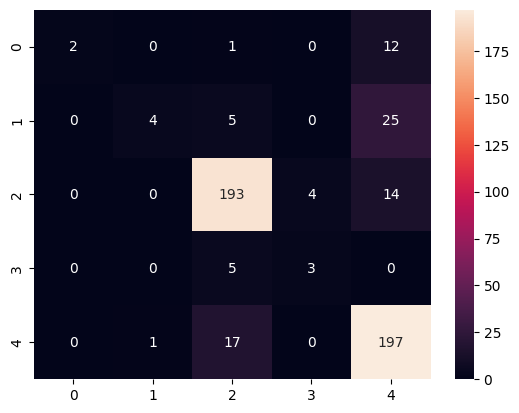

In [59]:
sns.heatmap(cm, annot=True, fmt='d')

In [18]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(7,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(5 ,activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test), callbacks=[early])

Epoch 1/200
31/31 [==============================] - 3s 23ms/step - loss: 1.2451 - accuracy: 0.4734 - val_loss: 1.0356 - val_accuracy: 0.6315
Epoch 2/200
31/31 [==============================] - 0s 7ms/step - loss: 1.0251 - accuracy: 0.6166 - val_loss: 0.9435 - val_accuracy: 0.6708
Epoch 3/200
31/31 [==============================] - 0s 7ms/step - loss: 0.9481 - accuracy: 0.6564 - val_loss: 0.8765 - val_accuracy: 0.6936
Epoch 4/200
31/31 [==============================] - 0s 6ms/step - loss: 0.8889 - accuracy: 0.6738 - val_loss: 0.8307 - val_accuracy: 0.6667
Epoch 5/200
31/31 [==============================] - 0s 7ms/step - loss: 0.8458 - accuracy: 0.7045 - val_loss: 0.7758 - val_accuracy: 0.7288
Epoch 6/200
31/31 [==============================] - 0s 7ms/step - loss: 0.7998 - accuracy: 0.7321 - val_loss: 0.7364 - val_accuracy: 0.7308
Epoch 7/200
31/31 [==============================] - 0s 7ms/step - loss: 0.7617 - accuracy: 0.7495 - val_loss: 0.7025 - val_accuracy: 0.7391
Epoch 8/200


In [21]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

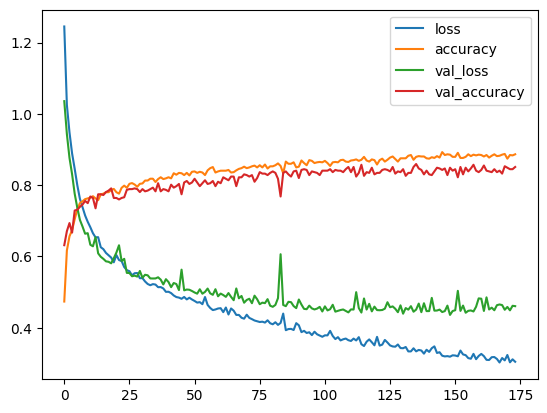

In [23]:
model_loss.plot()

In [24]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.8509


[0.4604611396789551, 0.850931704044342]

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(7,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5 ,activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test), callbacks=[early])

Epoch 1/200
31/31 [==============================] - 3s 17ms/step - loss: 1.2964 - accuracy: 0.4254 - val_loss: 1.0792 - val_accuracy: 0.4907
Epoch 2/200
31/31 [==============================] - 0s 7ms/step - loss: 1.1143 - accuracy: 0.4775 - val_loss: 1.0204 - val_accuracy: 0.6170
Epoch 3/200
31/31 [==============================] - 0s 7ms/step - loss: 1.0907 - accuracy: 0.5153 - val_loss: 0.9893 - val_accuracy: 0.6356
Epoch 4/200
31/31 [==============================] - 0s 7ms/step - loss: 1.0523 - accuracy: 0.5746 - val_loss: 0.9530 - val_accuracy: 0.6522
Epoch 5/200
31/31 [==============================] - 0s 7ms/step - loss: 1.0192 - accuracy: 0.5982 - val_loss: 0.9187 - val_accuracy: 0.6729
Epoch 6/200
31/31 [==============================] - 0s 11ms/step - loss: 1.0007 - accuracy: 0.6094 - val_loss: 0.8840 - val_accuracy: 0.6687
Epoch 7/200
31/31 [==============================] - 0s 16ms/step - loss: 0.9570 - accuracy: 0.6258 - val_loss: 0.8590 - val_accuracy: 0.6708
Epoch 8/20

In [26]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8634


[0.39989256858825684, 0.8633540272712708]